## Advanced pygplates plotting examples

This notebook contains examples of python code that takes gplates-readable input files, makes reconstructions, and plots with GMT (tested with version 5.1 and 5.3)

In the first section, import pygplates and reconstruct coastlines and static polygons, saving the output to GMT xy format.


In [14]:
import pygplates

# Names of input files
input_coastlines_filename = '../Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_static_polygons_filename = '../Data/Seton_etal_ESR2012_StaticPolygons_2012.1.gpmlz'
input_rotation_filename = '../Data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 180

# Name of output files
output_static_polygons_filename = './static_polygons.xy'
output_coastlines_filename = './coastlines.xy'

# Use pygplates.reconstruct to carry out the reconstruction, once for each input feature collection
pygplates.reconstruct(input_coastlines_filename, input_rotation_filename, output_coastlines_filename, reconstruction_time)
pygplates.reconstruct(input_static_polygons_filename, input_rotation_filename, output_static_polygons_filename, reconstruction_time)


The cell below creates the plot, converts the postscript to png, then displays within the notebook. 


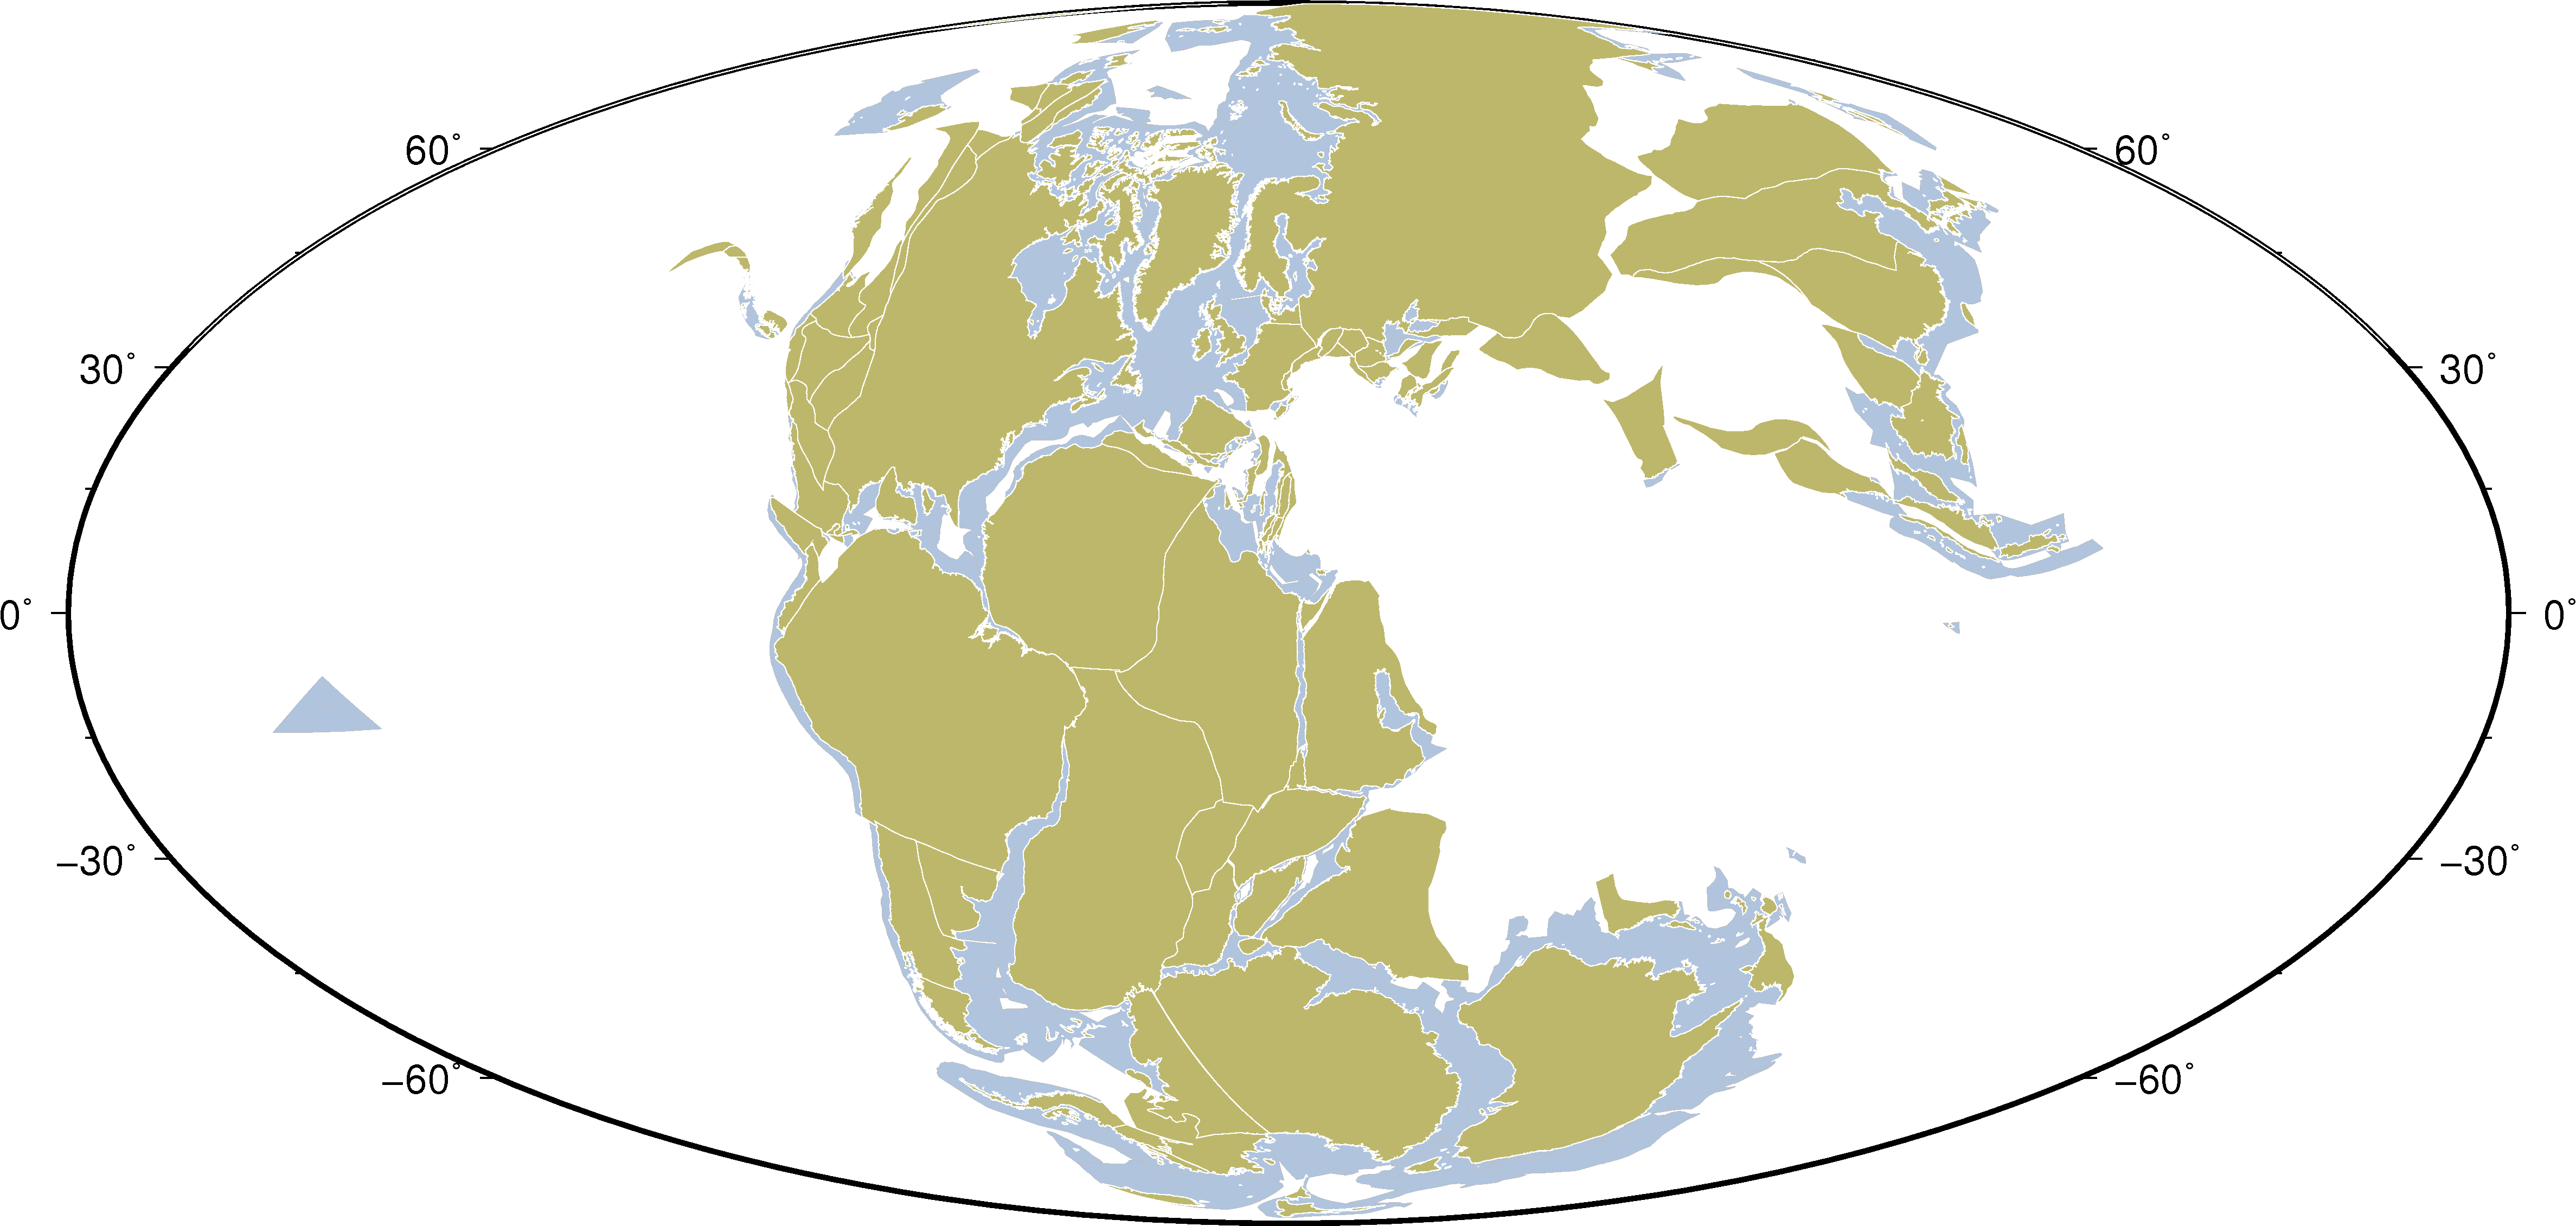

In [13]:
import os
from IPython.display import Image

outfile='./gmtplot.ps'

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW30/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba90f30/a30f15 -K > %s ' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,gray -Glightsteelblue ./static_polygons.xy -O -K -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,white -Gdarkkhaki ./coastlines.xy -O -N >> %s' % (proj,outfile))
os.system('gmt psconvert %s -A -E450 -Tg -P' % outfile)

Image('./gmtplot.png')


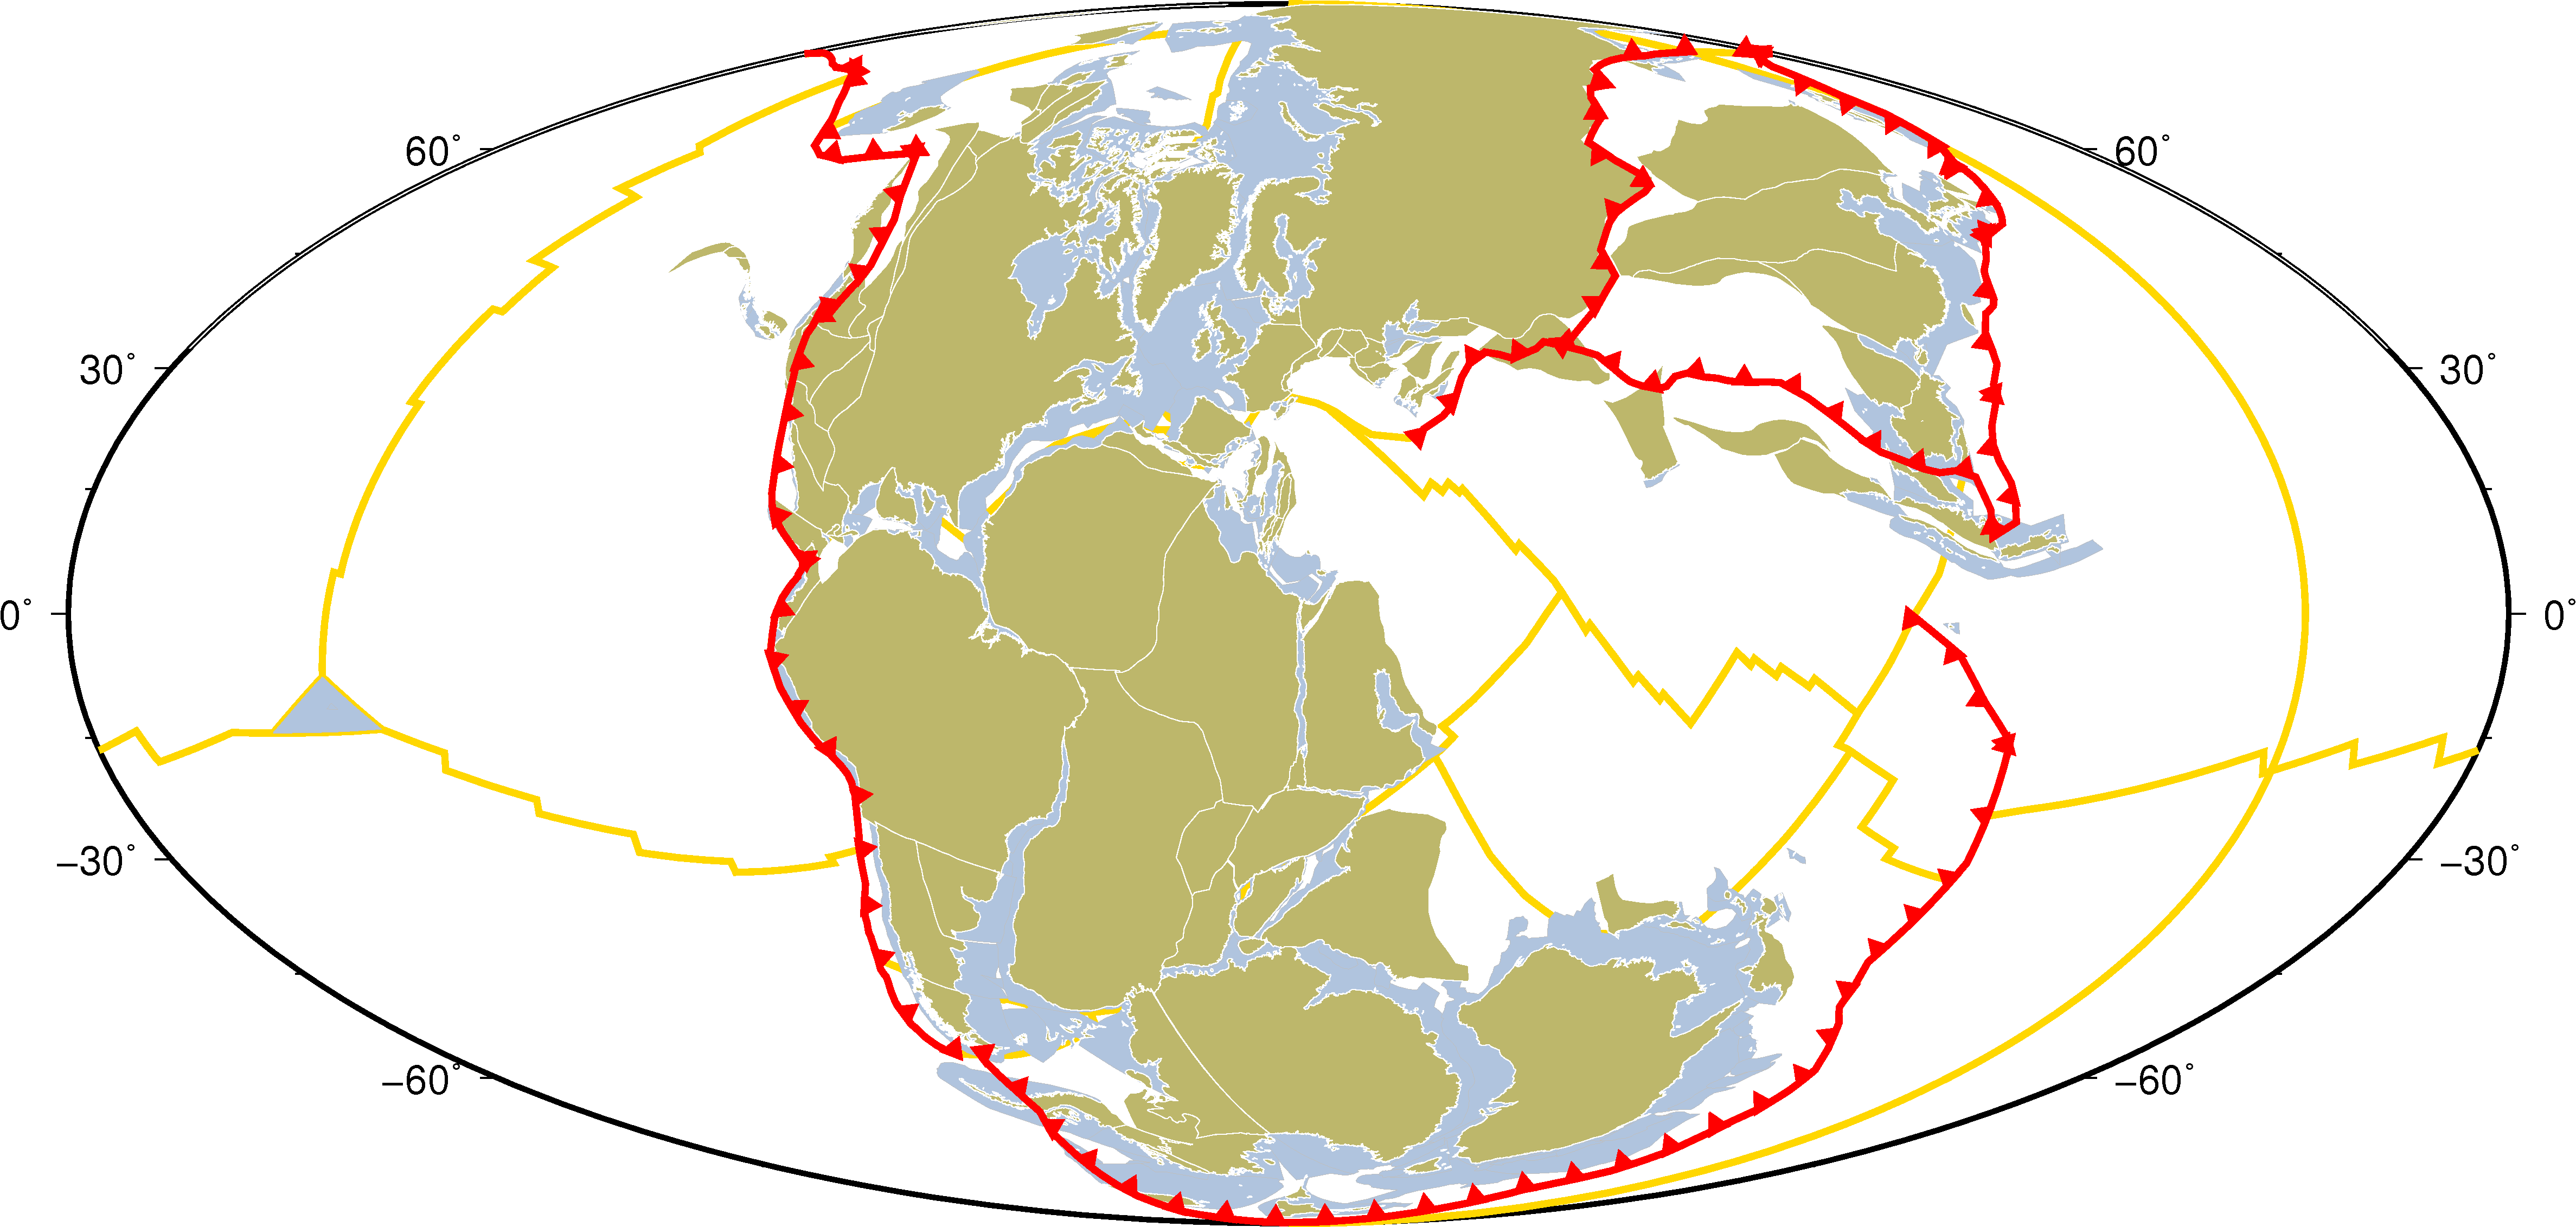

In [10]:
from resolve_topologies import resolve_topologies as topology2gmt

input_topology_filename = '../Data/Seton_etal_ESR2012_PP_2012.1.gpmlz'
#reconstruction_time = 180
output_filename_prefix = ''
output_filename_extension = 'gmt'

topology2gmt(input_rotation_filename, 
             input_topology_filename, 
             reconstruction_time, 
             output_filename_prefix, 
             output_filename_extension, 
             0)


outfile='./gmtplot.ps'

proj='-JW30/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba90f30/a30f15 -K > %s ' % (proj,outfile))

os.system('gmt psxy -Rg %s -W2.0p,gold -K -O -m boundary_polygons_%0.2fMa.gmt -V >> %s' % (proj,reconstruction_time,outfile))

os.system('gmt psxy -Rg %s -W0.1p,gray -Glightsteelblue ./static_polygons.xy -O -K -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,white -Gdarkkhaki ./coastlines.xy -O -K -N >> %s' % (proj,outfile))

os.system('gmt psxy -Rg %s -W2.0p,red -Sf15p/4plt -K -O -m subduction_boundaries_sL_%0.2fMa.gmt -Gred -V >> %s' % (proj,reconstruction_time,outfile))
os.system('gmt psxy -Rg %s -W2.0p,red -Sf15p/4prt -O -m subduction_boundaries_sR_%0.2fMa.gmt -Gred -V >> %s' % (proj,reconstruction_time,outfile))

os.system('gmt psconvert %s -A -E450 -Tg -P' % outfile)

Image('gmtplot.png')


